
# Programa Ejemplo para Realizar Aprendizaje Supervisado

## Etapa 1: Entendimiento de los datos
Antes de comenzar incluso a preprocesar los datos, debemos conocer las características del conjunto de datos que tenemos.

Como mínimo debemos saber:
-  Cuántos registros hay?
-  Cuantos atributos tiene cada registro?
-  De qué tipo son los atributos?

Además:
-  Obtener una medida de centralidad para cada atributo
-  Obtener una medida de dispersión o desviación para los atributos que ésto tenga sentido
-  Calcular la matriz de correlación de los atributos de entrada para identificar atributos redundantes

Como paso previo al preprocesamiento de los datos, debemos:
-  Detectar si hay datos faltantes (determinar en qué columnas y cuantos datos faltan en un mismo registro)
-  Detectar si hay datos atípicos
-  Detectar si hay desbalance entre clases

Notar que en esta etapa no hacemos ninguna modificación sobre los datos, sólo estamos conociéndolos a fondo para saber con qué material contamos para trabajar.


In [22]:
# Carga de librerías y lectura del archivo que contiene los datos

import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

url="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
data = pd.read_csv(url, header=None, na_values=" ?")

# Se etiquetan las columnas para poder interpretar más fácilmente los datos.
# Cada fila es un ejemplo, cada columna un atributo.
# La columna llamada C es el atributo a predecir
data.columns = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num', 'Marital-status', 'Occupation',
              'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hpw', 'Country', 'C']
data.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [23]:
#Cuál es el número de registros?
#Cuál es el número de atributos?

shape = data.shape
shape

(32561, 15)

### Cuál es el número de registros?
Hay ***32561*** registros en el conjunto de datos.

### Cuál es el número de atributos?
Hay ***15*** atributos para cada registro en el conjunto de datos.

In [24]:
#Cual es el tipo de los atributos?
data.dtypes

,0
Age,int64
Workclass,object
Fnlwgt,int64
Education,object
Education-num,int64
Marital-status,object
Occupation,object
Relationship,object
Race,object
Sex,object


In [25]:
#Medida de centralidad y desviación para atributos numéricos:
data.describe()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hpw
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


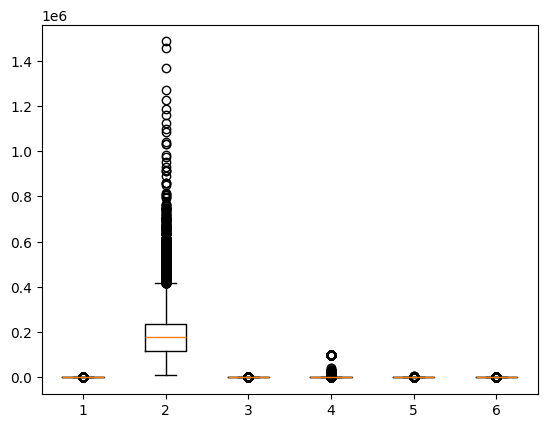

In [26]:
# Diagrama de cajas y bigotes para atributos numéricos
# Permite identificar la existencia de datos atípicos

plt.boxplot((data['Age'],data['Fnlwgt'],data['Education-num'],data['Capital-gain'],data['Capital-loss'], data['Hpw']))
plt.show()

In [27]:
#Medida de centralidad para atributos categóricos:
data.mode()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,36.0,Private,123011,HS-grad,9.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
1,NaN,NaN,164190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,203488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Correlación entre los atributos de entrada numéricos
# Permite detectar si hay atributos redundantes (correlación mayor a 0.85 o menor a -0.85)

numeric_data = data.select_dtypes(include=np.number)
numeric_data.corr()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hpw
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
Education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
Capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
Capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
Hpw,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [29]:
# Cual es el máximo de datos faltantes en un mismo registro?
# Si hay registros a los que les faltan muchos valores, es mejor eliminarlos.
max(data.isnull().sum(axis=1))

3

In [30]:
#Cuantos datos faltantes hay por cada atributo?
data.isnull().sum()

,0
Age,0
Workclass,1836
Fnlwgt,0
Education,0
Education-num,0
Marital-status,0
Occupation,1843
Relationship,0
Race,0
Sex,0


In [31]:
#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?

print(data['C'].value_counts())

C
<=50K    24720
>50K      7841
Name: count, dtype: int64


## Etapa 2: Preparación de los datos
De acuerdo a lo observado en la etapa 1, se define una secuencia de actividades que modifican los datos para eliminar las situaciones que puedan ser causa de fallo o deficiencia en el proceso de aprendizaje. En este caso se van a realizar las siguientes actividades:


1.   Completar los datos faltantes utilizando la media para atributos numéricos y la moda para atributos categóricos.
2.   Convertir los atributos categóricos a escala numérica.
3.   Normalizar los valores de algunos los atributos.
4.   Balancear las clases eliminando registros de la clase mayoritaria.






In [32]:
# Se reemplazan los datos faltantes (NaN) por la moda de cada atributo.
data["Workclass"].fillna("Private", inplace = True)
data["Occupation"].fillna("Prof-specialty", inplace = True)
data["Country"].fillna("United-States", inplace = True)
data.head()

<ipython-input-32-748dc70a9c2f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Workclass"].fillna("Private", inplace = True)
<ipython-input-32-748dc70a9c2f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [33]:
from sklearn.preprocessing import LabelEncoder

# Se convierten los atributos categóricos a valores numéricos
labelencoder= LabelEncoder()
data['Country'] = labelencoder.fit_transform(data['Country'])
data['Occupation'] = labelencoder.fit_transform(data['Occupation'])
data['Workclass'] = labelencoder.fit_transform(data['Workclass'])
data['Education'] = labelencoder.fit_transform(data['Education'])
data['Marital-status'] = labelencoder.fit_transform(data['Marital-status'])
data['Relationship'] = labelencoder.fit_transform(data['Relationship'])
data['Race'] = labelencoder.fit_transform(data['Race'])
data['Sex'] = labelencoder.fit_transform(data['Sex'])
data['C'] = labelencoder.fit_transform(data['C'])
data.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [34]:
from sklearn import preprocessing

# Se normalizan los tres atributos seleccionados
data['Fnlwgt'] = preprocessing.scale(data['Fnlwgt'])
data['Capital-gain'] = preprocessing.scale(data['Capital-gain'])
data['Capital-loss'] = preprocessing.scale(data['Capital-loss'])
data.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,39,6,-1.063611,9,13,4,0,1,4,1,0.148453,-0.21666,40,38,0
1,50,5,-1.008707,9,13,2,3,0,4,1,-0.145920,-0.21666,13,38,0
2,38,3,0.245079,11,9,0,5,1,4,1,-0.145920,-0.21666,40,38,0
3,53,3,0.425801,1,7,2,5,0,2,1,-0.145920,-0.21666,40,38,0
4,28,3,1.408176,9,13,2,9,5,2,0,-0.145920,-0.21666,40,4,0


In [35]:
# Se hace balanceo de clases eliminando ejemplos de la clase mayoritaria
g = data.groupby('C')
dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
dataBal

<ipython-input-35-5a53e21d1c3a>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))


Age  Workclass    Fnlwgt  Education  Education-num  Marital-status  \
C                                                                            
0 0      63          5  2.034789         11              9               2   
  1      34          3 -0.589004          9             13               4   
  2      41          3 -0.785217          9             13               2   
  3      33          3 -0.110578          9             13               4   
  4      53          5  1.148683          0              6               2   
...     ...        ...       ...        ...            ...             ...   
1 7836   31          3  2.684595         12             14               2   
  7837   26          3  0.570920         15             10               2   
  7838   61          8 -0.477387         15             10               2   
  7839   32          3 -0.027991          9             13               2   
  7840   48          0  1.291064          9             13               2   

        Occupation  Relationship  Race  Sex  Capital-gain  Capital-loss  Hpw  \
C                                                                              
0 0              2             0     4    1     -0.145920      -0.21666   30   
  1              9             3     4    0     -0.145920      -0.21666   15   
  2             12             0     4    1     -0.145920      -0.21666   38   
  3              2             3     4    1     -0.145920      -0.21666   20   
  4              4             0     4    1     -0.145920      -0.21666   60   
...            ...           ...   ...  ...           ...           ...  ...   
1 7836           9             0     4    1      0.555214      -0.21666   40   
  7837           0             0     4    1     -0.145920      -0.21666   40   
  7838          14             0     4    1     13.394578      -0.21666   30   
  7839           2             0     4    1     -0.145920      -0.21666   40   
  7840           9             0     4    1     -0.145920      -0.21666   44   

        Country  C  
C                   
0 0          38  0  
  1          38  0  
  2          38  0  
  3          38  0  
  4          38  0  
...         ... ..  
1 7836       38  1  
  7837       38  1  
  7838       38  1  
  7839       38  1  
  7840       38  1  

[15682 rows x 15 columns]

In [36]:
# Se verifica que haya quedado el mismo número de registros por cada clase
print(dataBal['C'].value_counts())

C
0    7841
1    7841
Name: count, dtype: int64


## Etapa 3: Modelado
En esta etapa se van a utilizar los datos para realizar aprendizaje del atributo C a partir de los valores de los demás atributos. Es decir, se va a predecir si una persona tiene ingresos superiores o inferiores a 50K dolares. Las actividades a realizar son:
1.   Dividir el conjunto de datos en conjuntos de entrenamiento y test.
2.   Realizar el entrenamiento del modelo de regresión logística utilizando para ello el conjunto de entrenamiento.
3.   Aplicar el modelo construido a los datos del conjunto de test.
4.   Cálculo de una métrica de desempeño para evaluar la calidad del modelo en sus prediciones sobre el conjunto de test.

In [37]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataBal.drop('C', axis=1), dataBal.C, test_size=0.30)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(10977, 14) (10977,)
(4705, 14) (4705,)


In [38]:
# Entrenamiento del modelo de clasificación por regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logisticRegr = LogisticRegression(solver="lbfgs", max_iter=500, tol=0.01)
logisticRegr.fit(X_train, y_train)


LogisticRegression(max_iter=500, tol=0.01)

In [39]:
# Aplicación del modelo construido a los datos de test
predictions = logisticRegr.predict(X_test)
predictions

array([1, 1, 1, ..., 1, 0, 1])

In [40]:
# Cálculo del accuracy para evaluar el desempeño del modelo sobre los datos de test
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.7540913921360255

# Fin del programa

# **Acción**
## **PROGRAMA MODIFICADO**
### **Realizado por: Juan José Restrepo Rosero**


## Etapa #1 Análisis Exploratorio de los Datos

In [52]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [53]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
modified_data = pd.read_csv(url, header=None, na_values=" ?")

In [54]:
modified_data.columns = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num', 'Marital-status', 'Occupation',
                    'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hpw', 'Country', 'C']
modified_data.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [55]:
modified_data.shape

(32561, 15)

In [56]:
modified_data.dtypes

,0
Age,int64
Workclass,object
Fnlwgt,int64
Education,object
Education-num,int64
Marital-status,object
Occupation,object
Relationship,object
Race,object
Sex,object


In [57]:
modified_data.describe()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hpw
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [58]:
modified_data.isnull().sum()

,0
Age,0
Workclass,1836
Fnlwgt,0
Education,0
Education-num,0
Marital-status,0
Occupation,1843
Relationship,0
Race,0
Sex,0


In [59]:
modified_data['C'].value_counts()

,count
C,
<=50K,24720
>50K,7841


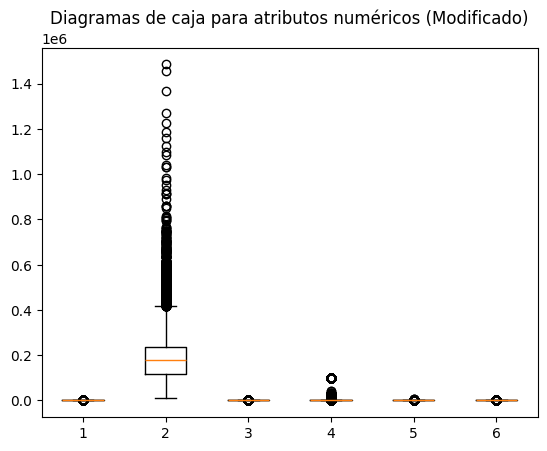

In [60]:
plt.boxplot((modified_data['Age'], modified_data['Fnlwgt'], modified_data['Education-num'], modified_data['Capital-gain'], modified_data['Capital-loss'], modified_data['Hpw']))
plt.title("Diagramas de caja para atributos numéricos (Modificado)")
plt.show()

In [61]:
numeric_data_modified = modified_data.select_dtypes(include=np.number)
print("\nMatriz de Correlación entre variables numéricas en el Dataset Modificado:")
numeric_data_modified.corr()


Matriz de Correlación entre variables numéricas en el Dataset Modificado:


,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hpw
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
Education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
Capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
Capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
Hpw,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000



## Etapa #2 Preparación de los Datos

In [62]:
modified_data["Workclass"] = modified_data["Workclass"].fillna("Private")
modified_data["Occupation"] = modified_data["Occupation"].fillna("Prof-specialty")
modified_data["Country"] = modified_data["Country"].fillna("United-States")
modified_data.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [63]:
labelencoder_mod = LabelEncoder()
categorical_columns_mod = ['Workclass', 'Education', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country', 'C']

for col in categorical_columns_mod:
    modified_data[col] = labelencoder_mod.fit_transform(modified_data[col])

In [64]:
scaler_modified = StandardScaler()
modified_data[['Capital-gain', 'Capital-loss']] = scaler_modified.fit_transform(modified_data[['Capital-gain', 'Capital-loss']])

In [65]:
g_mod = modified_data.groupby('C')
data_balanced_modified = pd.DataFrame(g_mod.apply(lambda x: x.sample(g_mod.size().min()).reset_index(drop=True)))

print("\nNúmero de Registros balanceados por Clase en el Dataset Modificado:")
print(data_balanced_modified['C'].value_counts())


Número de Registros balanceados por Clase en el Dataset Modificado:
C
0    7841
1    7841
Name: count, dtype: int64


<ipython-input-65-eafc6c2d3b51>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_balanced_modified = pd.DataFrame(g_mod.apply(lambda x: x.sample(g_mod.size().min()).reset_index(drop=True)))


### Eliminación del Atributo ***Fnlwgt*** en el dataset modificado

In [66]:
data_balanced_modified = data_balanced_modified.drop('Fnlwgt', axis=1)
print("\nAtributo 'Fnlwgt' eliminado en el dataset modificado. Nuevas columnas:")
data_balanced_modified.columns


Atributo 'Fnlwgt' eliminado en el dataset modificado. Nuevas columnas:


Index(['Age', 'Workclass', 'Education', 'Education-num', 'Marital-status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain',
       'Capital-loss', 'Hpw', 'Country', 'C'],
      dtype='object')


## Etapa #3 Modelado

Dividimos los datos en Entrenamiento y Prueba en proporciones de 60% y 40% respectivamente en el dataset modificado

In [67]:
X_train_mod, X_test_mod, y_train_mod, y_test_mod = train_test_split(
    data_balanced_modified.drop('C', axis=1), data_balanced_modified.C, test_size=0.40, random_state=42)

print("\nTamaño de los datos de entrenamiento en el dataset modificado:", X_train_mod.shape, y_train_mod.shape)
print("Tamaño de los datos de prueba en el dataset modificado:", X_test_mod.shape, y_test_mod.shape)


Tamaño de los datos de entrenamiento en el dataset modificado: (9409, 13) (9409,)
Tamaño de los datos de prueba en el dataset modificado: (6273, 13) (6273,)


Para entrenar el model, usaremos un ***Árbol de Decisiomes*** en el Dataset Modificado

In [68]:
tree_model_modified = DecisionTreeClassifier(random_state=42)
tree_model_modified.fit(X_train_mod, y_train_mod)

DecisionTreeClassifier(random_state=42)

In [70]:
tree_predictions_modified = tree_model_modified.predict(X_test_mod)
print("\nPrimeras predicciones del Árbol de Decisiones en el dataset modificado:")
print(tree_predictions_modified[:10])


Primeras predicciones del Árbol de Decisiones en el dataset modificado:
[1 1 0 1 1 0 1 0 0 0]


In [76]:
accuracy_modified = accuracy_score(y_test_mod, tree_predictions_modified)

print("\nAccuracy del Árbol de Decisiones en el Dataset Modificado:", round(accuracy_modified, 3))


Accuracy del Árbol de Decisiones en el Dataset Modificado: 0.756


In [77]:
print("\nReporte de clasificación del árbol de decisión en el dataset modificado:")

print(classification_report(y_test_mod, tree_predictions_modified))


Reporte de clasificación del árbol de decisión en el dataset modificado:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76      3126
           1       0.77      0.73      0.75      3147

    accuracy                           0.76      6273
   macro avg       0.76      0.76      0.76      6273
weighted avg       0.76      0.76      0.76      6273



## Análisis Comparativo

In [80]:
# Extraer métricas del modelo original (regresión logística)
logistic_accuracy = accuracy_score(y_test, predictions)
logistic_report = classification_report(y_test, predictions, output_dict=True)

In [82]:
# Extraer métricas del modelo modificado (árbol de decisión)
tree_accuracy = accuracy_score(y_test_mod, tree_predictions_modified)
tree_report = classification_report(y_test_mod, tree_predictions_modified, output_dict=True)

### Creamos una Tabla de Comparación de Métricas

In [85]:
# Crear una tabla de comparación de métricas
comparison = pd.DataFrame({
    "Metric": ["Accuracy", "Precision (Clase 0)", "Recall (Clase 0)", "F1-Score (Clase 0)",
               "Precision (Clase 1)", "Recall (Clase 1)", "F1-Score (Clase 1)"],
    "Logistic Regression": [
        logistic_accuracy,
        logistic_report['0']['precision'], logistic_report['0']['recall'], logistic_report['0']['f1-score'],
        logistic_report['1']['precision'], logistic_report['1']['recall'], logistic_report['1']['f1-score']
    ],
    "Decision Tree": [
        tree_accuracy,
        tree_report['0']['precision'], tree_report['0']['recall'], tree_report['0']['f1-score'],
        tree_report['1']['precision'], tree_report['1']['recall'], tree_report['1']['f1-score']
    ]
})
comparison

,Metric,Logistic Regression,Decision Tree
0,Accuracy,0.754091,0.755779
1,Precision (Clase 0),0.761504,0.741955
2,Recall (Clase 0),0.735785,0.781830
3,F1-Score (Clase 0),0.748424,0.761371
4,Precision (Clase 1),0.747239,0.771064
5,Recall (Clase 1),0.772189,0.729901
6,F1-Score (Clase 1),0.759509,0.749918


In [86]:
metrics = ["Accuracy", "Precision (Clase 0)", "Recall (Clase 0)", "F1-Score (Clase 0)",
           "Precision (Clase 1)", "Recall (Clase 1)", "F1-Score (Clase 1)"]
logistic_values = comparison["Logistic Regression"]
tree_values = comparison["Decision Tree"]

### Gráfico de Comparación de Métricas entre Modelos

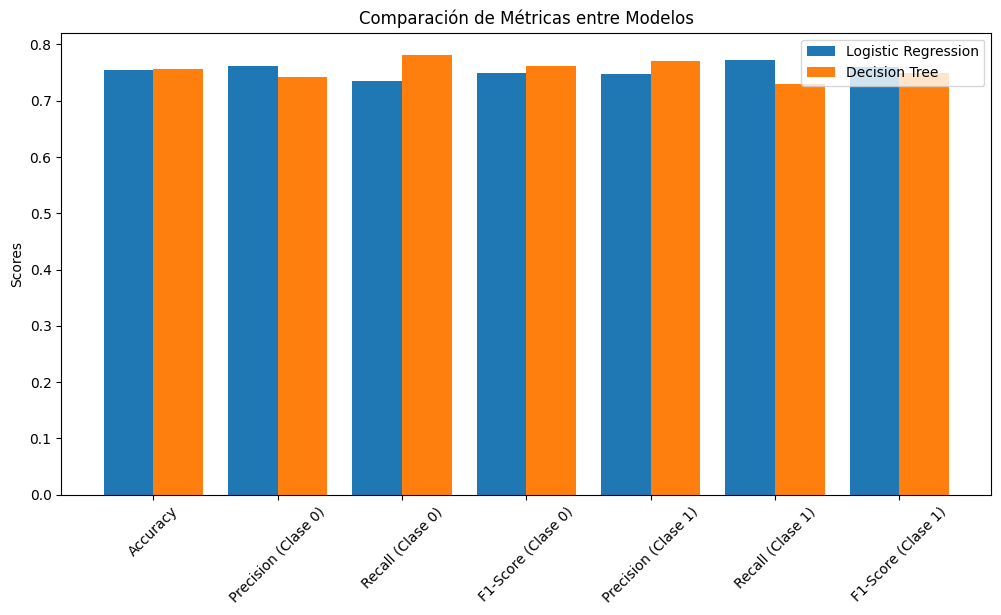

Número de columnas en X_train: 14
Número de importancias del modelo: 13


In [89]:
x = range(len(metrics))
plt.figure(figsize=(12, 6))
plt.bar(x, logistic_values, width=0.4, label="Logistic Regression", align="center")
plt.bar([i + 0.4 for i in x], tree_values, width=0.4, label="Decision Tree", align="center")
plt.xticks([i + 0.2 for i in x], metrics, rotation=45)
plt.ylabel("Scores")
plt.title("Comparación de Métricas entre Modelos")
plt.legend()
plt.show()

In [90]:
print("Número de columnas en X_train:", len(X_train.columns))
print("Número de importancias del modelo:", len(tree_model_modified.feature_importances_))

Número de columnas en X_train: 14
Número de importancias del modelo: 13


In [97]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns[:len(tree_model_modified.feature_importances_)],
    'Importance': tree_model_modified.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Convertir importancias a porcentaje
feature_importance['Importance (%)'] = (feature_importance['Importance'] * 100).round(2)

# Mostrar tabla con importancias en porcentaje
print(feature_importance)

           Feature  Importance  Importance (%)
6       Occupation    0.308216           30.82
0              Age    0.168908           16.89
3        Education    0.107283           10.73
9              Sex    0.093792            9.38
11    Capital-loss    0.089551            8.96
5   Marital-status    0.087786            8.78
1        Workclass    0.043165            4.32
10    Capital-gain    0.025454            2.55
2           Fnlwgt    0.022547            2.25
7     Relationship    0.018794            1.88
12             Hpw    0.017810            1.78
4    Education-num    0.008774            0.88
8             Race    0.007918            0.79


In [98]:
print("Columnas en X_train:", X_train.columns)

Columnas en X_train: Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num',
       'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-gain', 'Capital-loss', 'Hpw', 'Country'],
      dtype='object')


### Gráfico de importancias en porcentaje

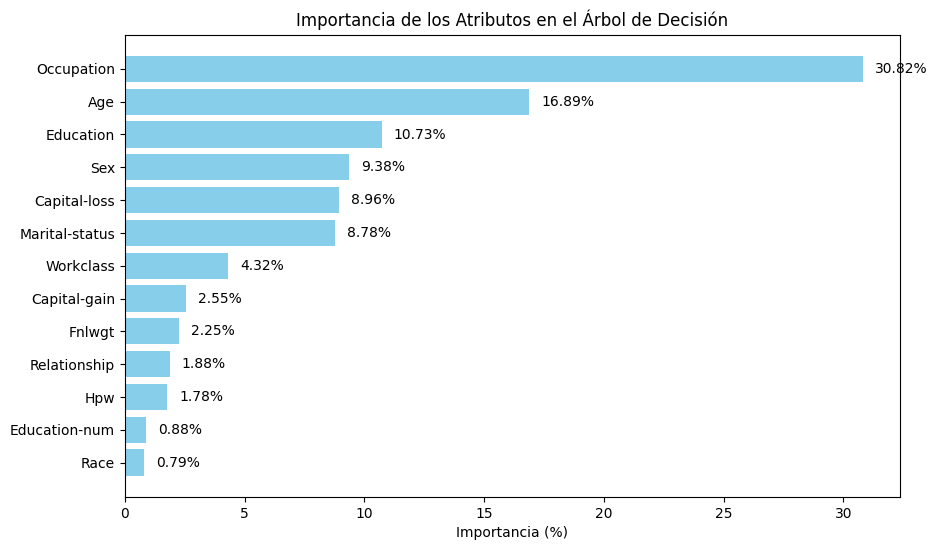

In [102]:
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance['Feature'], feature_importance['Importance (%)'], color='skyblue')

plt.xlabel('Importancia (%)')
plt.title('Importancia de los Atributos en el Árbol de Decisión')
plt.gca().invert_yaxis()

for bar in bars:
    plt.text(bar.get_width() + 0.5,
             bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}%',  # Texto con 2 decimales y el símbolo de porcentaje
             va='center')

plt.show()

## **CONCLUSIONES**

### 1. Precisión Global (Accuracy)

El modelo de Árbol de Decisión obtuvo una precisión de **0.7558**, ligeramente superior a la de la Regresión Logística (**0.7541**). Esta mejora marginal sugiere que el Árbol de Decisión tiene un rendimiento ligeramente mejor en la clasificación general.  

### 2. Desempeño por Clase

#### **Clase 0 (Precisión, Recall y F1-Score)**  

- **Precisión:** La regresión logística presenta un valor de **0.7615**, mientras que el árbol de decisión obtiene **0.7420**, lo que indica que la regresión logística tiene **una menor tasa de falsos positivos** en esta clase.  
- **Recall:** El árbol de decisión alcanza **0.7818**, superando a la regresión logística (**0.7358**), lo que significa que identifica **mejor los casos positivos** para la Clase 0.  
- **F1-Score:** El árbol de decisión logra **0.7614**, ligeramente superior a la regresión logística (**0.7484**), mostrando un mejor equilibrio entre precisión y recall.  

#### **Clase 1 (Precisión, Recall y F1-Score)**  

- **Precisión:** El árbol de decisión obtiene **0.7711**, superando a la regresión logística (**0.7472**), lo que indica una **menor tasa de falsos positivos** en la Clase 1.  
- **Recall:** La regresión logística alcanza **0.7722**, mientras que el árbol de decisión obtiene **0.7299**, lo que indica que la regresión logística tiene **una mejor capacidad de detectar los casos positivos** en esta clase.  
- **F1-Score:** La regresión logística logra **0.7595**, superando al árbol de decisión (**0.7499**), lo que sugiere que en esta métrica el modelo de regresión tiene un rendimiento más equilibrado.  

### 3. Conclusión General

Ambos modelos presentan un **desempeño muy similar**, con diferencias en métricas específicas:

- **El árbol de decisión** muestra una **ligera ventaja en precisión global (Accuracy)** con **0.7558** frente a **0.7541** de la regresión logística.  
- **En la Clase 0**, el árbol de decisión tiene **mejor recall y F1-Score**, pero menor precisión.  
- **En la Clase 1**, la regresión logística obtiene **mejor recall y F1-Score**, mientras que el árbol de decisión destaca en precisión.  

Dado que las diferencias son mínimas, la selección del modelo dependerá del objetivo específico:  
- Si es **más importante minimizar falsos positivos**, el **árbol de decisión** es preferible debido a su mayor precisión en ambas clases.  
- Si se busca **maximizar la detección de casos positivos en la Clase 1**, la **regresión logística** es una mejor opción.  


## **ATRIBUTO ELIMINADO**

## Importancia de los Atributos en el Árbol de Decisión  

Es importante aclarar que los valores de importancia asignados a cada atributo no representan **porcentajes en su forma original**. En realidad, son **proporciones normalizadas**, donde la suma total de todas las importancias es igual a **1**. Para facilitar la interpretación, estos valores se han convertido a **porcentajes** multiplicándolos por **100**.

### 1. Eliminación del Atributo *Fnlwgt*  

Durante el proceso de entrenamiento del modelo, el atributo **Fnlwgt** fue eliminado del conjunto de datos, lo que indica que **no contribuye significativamente** a las predicciones en la versión final del modelo.

### 2. Importancia del Atributo Eliminado  

Según las métricas obtenidas, la importancia de *Fnlwgt* en el árbol de decisión es de **2.25%**. Este valor es **relativamente bajo** en comparación con otros atributos clave, como:

- **Occupation**: 30.82%  
- **Age**: 16.89%  
- **Education**: 10.73%  

Esto sugiere que *Fnlwgt* aporta **muy poca información útil** al modelo en relación con estos atributos más relevantes.

### 3. Comportamiento en el Árbol de Decisión  

Los árboles de decisión asignan mayor importancia a los atributos que permiten **dividir mejor los datos**, es decir, aquellos que generan una mayor **reducción de impureza** en cada nodo.  

Dado que *Fnlwgt* tiene una importancia baja (**2.25%**), es probable que **no participe en las divisiones principales** del árbol. En comparación, atributos como **Occupation** (**30.82%**) y **Age** (**16.89%**) desempeñan un papel mucho más relevante en la segmentación de los datos.  

Esto significa que el modelo funciona prácticamente **igual sin este atributo**, lo que justifica su eliminación durante el proceso de entrenamiento.



# **Conclusiones del Programa Modificado**  

El programa modificado buscó mejorar el modelo original utilizando un **Árbol de Decisión** en lugar de **Regresión Logística**, además de aplicar varias técnicas de preprocesamiento de datos. A continuación, se presentan las conclusiones clave:  

## **1. Desempeño del Modelo**  

- **Precisión Global (Accuracy):**  
  El modelo de Árbol de Decisión obtuvo una precisión de **0.7558**, ligeramente superior a la de la Regresión Logística (**0.7541**). Esta mejora marginal sugiere que el Árbol de Decisión tiene un rendimiento ligeramente mejor en la clasificación general.  

- **Desempeño por Clase:**  
  - **Clase 0:** El Árbol de Decisión logró una mejor **Recall** y **F1-Score**, lo que indica que identifica mejor los casos positivos para esta clase. Sin embargo, su precisión es un poco menor, lo que implica que podría generar más falsos positivos en comparación con la Regresión Logística.  
  - **Clase 1:** La Regresión Logística superó al Árbol de Decisión en **Recall** y **F1-Score**, mientras que el Árbol tuvo una mejor **Precisión**. Esto significa que la Regresión Logística es mejor capturando verdaderos positivos en la Clase 1, mientras que el Árbol de Decisión tiende a generar menos falsos positivos.  

## **2. Preprocesamiento de Datos**  

Para mejorar la calidad de los datos y optimizar el rendimiento del modelo, se aplicaron varias técnicas de preprocesamiento:  

- **Manejo de Valores Faltantes:** Se imputaron valores faltantes con la moda (para atributos categóricos) y probablemente con la media (para atributos numéricos). Esto garantiza que el modelo pueda manejar datos incompletos de manera efectiva.  
- **Codificación Categórica:** Se aplicó **Label Encoding** para convertir atributos categóricos a valores numéricos, lo cual es esencial para algoritmos de aprendizaje automático.  
- **Escalado de Características:** Se utilizó **StandardScaler** en los atributos **Capital-gain** y **Capital-loss** para evitar que sus valores elevados afectaran desproporcionadamente el modelo.  
- **Balanceo de Clases:** Se realizó **downsampling** de la clase mayoritaria, asegurando que ambas clases tuvieran una representación equitativa durante el entrenamiento, reduciendo así el sesgo hacia la clase predominante.  
- **Eliminación de *Fnlwgt***: Se decidió eliminar este atributo debido a su baja importancia en la predicción **(2.25%)**, lo que indica que no aportaba significativamente al desempeño del modelo.  

## **3. Importancia de los Atributos**  

El modelo de Árbol de Decisión permitió identificar los atributos más relevantes en la predicción:  

- **Occupation (30.82%)**, **Age (16.89%)** y **Education (10.73%)** son los atributos con mayor influencia en la clasificación.  
- La visualización de la importancia de los atributos proporciona una forma clara e interpretativa para comprender cómo el modelo toma decisiones.  
- Atributos como **Education-num (0.88%)** y **Race (0.79%)** tienen una contribución mínima, lo que indica que su impacto en la clasificación es muy bajo.  

## **4. Eliminación del Atributo *Fnlwgt***  

Como se mencionó anteriormente, *Fnlwgt* tenía una importancia del **2.25%**, lo que es relativamente bajo en comparación con atributos clave como:  

- **Occupation (30.82%)**  
- **Age (16.89%)**  
- **Education (10.73%)**  

Dado que los árboles de decisión asignan mayor importancia a los atributos que generan una mayor **reducción de impureza**, *Fnlwgt* probablemente no participaba en las divisiones principales del árbol, por lo que su eliminación no afectó el desempeño del modelo.  

## **5. Consideraciones para la Selección del Modelo**  

Dependiendo del objetivo específico, se pueden considerar las siguientes opciones:  

- Si **minimizar los falsos positivos** es prioritario, el **Árbol de Decisión** es la mejor opción debido a su mayor precisión.  
- Si el objetivo es **maximizar la detección de verdaderos positivos** en la clase minoritaria, la **Regresión Logística** sería más adecuada debido a su mayor recall en la Clase 1.  

## **6. Conclusión General**  

El programa modificado con el **Árbol de Decisión** y los pasos de **preprocesamiento de datos** muestra una ligera mejora en la precisión global en comparación con la Regresión Logística. Además, permite obtener información valiosa sobre la importancia relativa de cada atributo en la predicción.  

Aunque las diferencias entre ambos modelos son pequeñas, la elección final dependerá de los objetivos específicos del análisis y del equilibrio entre precisión y recall que se desee lograr.  


# **FIN DEL ANÁLISIS**